In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ClassificationTree import ClassificationTree

In [3]:
data = {
    'Likes Breaking Bad': [1, 0, 1, 1, 0, 1, 0, 1, 1, 0],
    'Likes Stranger Things': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0],
    'Likes The Good Place': [0, 1, 1, 0, 1, 0, 1, 1, 0, 1],
    'Likes Parks & Rec': [1, 0, 1, 0, 1, 1, 1, 0, 1, 0],
    'Age': [25, 30, 22, 35, 28, 40, 45, 50, 55, 60],
    'Likes Severance':   [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)

X = df.drop(columns=['Likes Severance']).values
y = df['Likes Severance'].values

df

,Likes Breaking Bad,Likes Stranger Things,Likes The Good Place,Likes Parks & Rec,Age,Likes Severance
0,1,1,0,1,25,1
1,0,1,1,0,30,0
2,1,0,1,1,22,1
3,1,1,0,0,35,0
4,0,0,1,1,28,1
5,1,1,0,1,40,0
6,0,1,1,1,45,1
7,1,0,1,0,50,0
8,1,1,0,1,55,1
9,0,0,1,0,60,0


In [4]:
tree = ClassificationTree(max_depth=1)

tree.fit(X,y)
ypreds = tree.predict(X)

df_res = pd.DataFrame({'Actual': y, 'Pred.': ypreds})
print(f'Accuracy: {round(np.mean(y == ypreds), 2)}')

df_res

Accuracy: 0.9


,Actual,Pred.
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
5,0,1
6,1,1
7,0,0
8,1,1
9,0,0


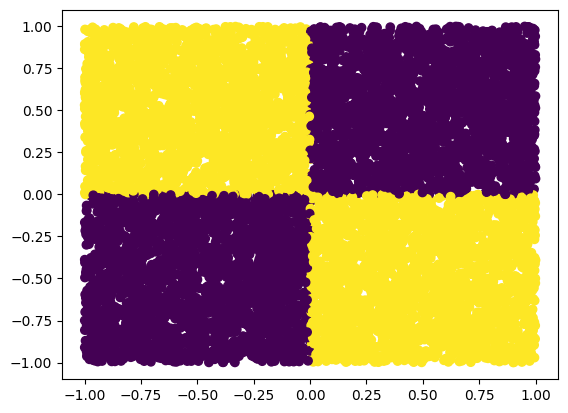

In [5]:
X = np.random.rand(10000, 2) * 2 - 1

y = ((X[:, 0] > 0) & (X[:, 1] < 0)) | ((X[:, 0] < 0) & (X[:, 1] > 0)).astype(int)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
tree_xor = ClassificationTree(max_depth=6)
tree_xor.fit(X_train, y_train)
preds = tree_xor.predict(X_test)

df_res = pd.DataFrame(X_test)
df_res['y'] = y_test
df_res['pred'] = preds

print(f'Accuracy: {np.mean(preds == y_test)}')
df_res.head()

Accuracy: 0.9995


,0,1,y,pred
0,-0.538597,-0.455357,0,0
1,-0.160463,0.188461,1,1
2,0.028524,-0.707896,1,1
3,0.295566,-0.638206,1,1
4,-0.735348,0.279728,1,1


In [11]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=6)

clf.fit(X_train, y_train)
preds = clf.predict(X_test)

df_res = pd.DataFrame(X_test)
df_res['y'] = y_test
df_res['pred'] = preds

print(f'Accuracy: {np.mean(preds == y_test)}')
df_res.head()

Accuracy: 0.9995


,0,1,y,pred
0,-0.538597,-0.455357,0,0
1,-0.160463,0.188461,1,1
2,0.028524,-0.707896,1,1
3,0.295566,-0.638206,1,1
4,-0.735348,0.279728,1,1
